# Ch04 Matplotlib으로 그래프를 그려 보자

이 장에서는 주로 2차원 데이터를 시각화 할 수 있는 Matplotlib로 꺽은선 그래프, 산포도 그래프, 막대그래프, 히스토그램, 상자수염 그래프, 원그래프의 기본적인 작성방법을 살펴본다. 

## ch04-01 Matplotlib이란

Matplotlib은 주로 2차원의 데이터를 시각화 하기 위한 서드파티 패키지이다. 동작하는 운영쓰템을 가리지 않는다는 점. 자세한 그리기 설정이 가능한 점. 다양한 출력 형식에 대응하고 있는 점 등 대표적인 시각화 툴로서 널리 사용되고 있다. 

Matplotlib은 2003년에 version 0.1이 발표된 이후로 10년 이상의 역사를 가진 툴로서 지금도 많은 사용자들에게 사용되고 있다. Matplotlib 사용자가 많은 이유는 산업계, 교육계에서 널리 사용되고 있는 수치해석 소프트웨어 MATLAB와 같은 그리기를 Python에서 사용할 수 있는점을 들 수 있다. MATLAB과 유사한 사용자 인터페이스는 MATLAB 사용자가 Matplotlib에 쉽게 접근할 수 있도록 하고 있다. Matplotlib의 장점은 다음과 같다. 

- 동작하는 운영체제를 가리지 않음
- MATLAB와 유사한 사용자 인터페이스를 가짐
- 그림 요소의 상세한 서식 설정 가능
- 다양한 출력형식으로 저장 가능

## ch04-02 그래프 그리기 기초

###  그래프 그리기 준비하기 
Matplotlib에서 그래프를 그리기 위해 matplotlib.pyplot 모듈을 불러온다.



Matplotlib 공식 페이지와 같이 알리아스명을 plt로 지정한다. 이 방법은 널리 사용되고 있다. 
Jupyter Notebook에 Matplotlib의 그래프를 출력할 때 show() 함수를 이옹한다. 

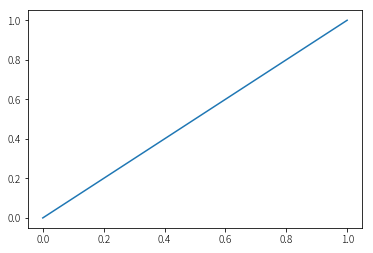

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)

dat = [0, 1]
ax.plot(dat)

# 그림을 인라인 표시
plt.show()

### 피겨와 서브플롯
Matplotlib에서는 그래프를 작성하기 전에 피겨 오브젝트와 서브플롯을 생성할 필요가 있다. 피겨는 서브플롯을 작성하는 영역이고 서브플롯은 그래프를 작성하기 위한 영역이다. 서브플롯은 최소 한 개 이상 작성할 필요가 있다. 

피겨에서 서브플롯을 추가하는 방법을 Figire.add_subplot()메서드와 pyplot.subplots()함수를 이용하는 방법이 있다. 

### add_subplot()메서드로 서브 플롯 배치하기

이 방법에서는 다음 코드 처럼 처음에 figure() 함수로 Figure 크래스의 인스턴스를 생성한다. 

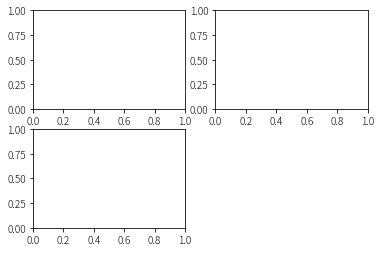

In [2]:
# 피겨 생성
fig = plt.figure()

# 피겨 안에 서브플롯을 3개 배치한다. 
ax1 = fig.add_subplot(221) # 2행 2열 1번
ax2 = fig.add_subplot(222) # 2행 2열 2번
ax3 = fig.add_subplot(223) # 2행 2열 3번

plt.show()

위에서 add_subplot()의 괄호안의 숫자는 첫 번째 부터 순서대로 "총 행수", "총 열수", "서브플롯 번호"를 나타낸다. 서브 플롯번호가 어떤 순서로 할당되는 지를 확인하기 위하여 다음 코드를 실행한다. 

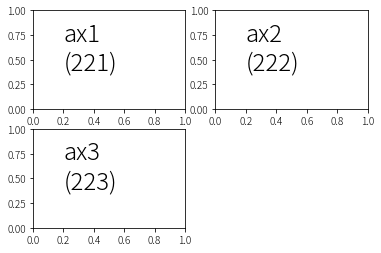

In [3]:
fig = plt.figure()

# 서브 플롯 작성
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

# 번호 기술
for i, ax in enumerate([ax1, ax2, ax3], start=1):
    txt = 'ax{0}\n(22{0})'.format(i)
    ax.text(0.2, 0.4, txt, fontsize=24)
    
plt.show()    

add_subplot()메서드에 따른 서브 플롯의 배치(콤마 단락 기법)

In [4]:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


### subplots() 함수를 이용해서 서브플롯 배치하기
앞에선느 서브플롯을 개별로 그리고 있지만 pyplot.subplots()함수를 사용해서 피겨 생성과 서브플롯의 배치를 동시에 실행하는 방법도 잇다. add_subplot()메서드와 비교해서 간결하게 코드를 기술할 수 있다. 

<class 'numpy.ndarray'> [[<matplotlib.axes._subplots.AxesSubplot object at 0x1140e7198>


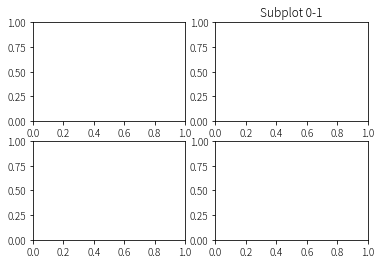

In [5]:
# 피겨 오브젝트 작성과 서브플롯 배치를 동시에 실행
fig, axes = plt.subplots(2, 2)
# 행렬로 서브플롯의 타이틀을 지정
axes[0,1].set_title('Subplot 0-1')
print(type(axes), axes)
plt.show()

### 스타일 적용하기

스타일이란 그래프의 선 굵기나 색 등 그래프의 "체재"에 관한 정보를 모아놓은 것이다. 

스타일은 style.use() 함수로 적용할 수 있다. 다음 코드는 ggplot 스타일을 적용하고 있다. 

ggplot 스타일에서는 초기 설정에서 그리드선이 그려진다. 값 설명이 쉽기 때문에 ggplot 스타일을 적용해서 그린다. 

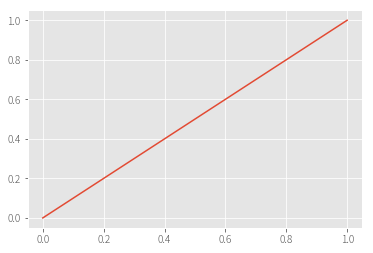

In [6]:
# 스타일 적용
plt.style.use('ggplot') # 그리드가 그려진다. 
fig = plt.figure()
ax = fig.add_subplot(111)

dat = [0, 1]
ax.plot(dat)

plt.show()

## ch04-03 꺽은선 그래프

꺽은선 그래프는 플롯된 점과 점을 직선으로 연결한(선형보간) 그래프이다. 

### 꺽은선 그래프 작성하기
꺽은선 그래프는 Axes.plot()메서드를 사용해서 그린다. 다음은 plot() 메서드에 리스트 [1, 3]을 부여한 코드이다. 실행 결과로 꺽은선 그패르가 출력된다. plot() 메서드의 인수가 하나뿐인 경우, 부여된 인수는 Y 값으로 설정되어 X값은 자동적으로 "최솟값=0", "최댓값=리스트 요소수-1" 의 정수열이 지정된다. 

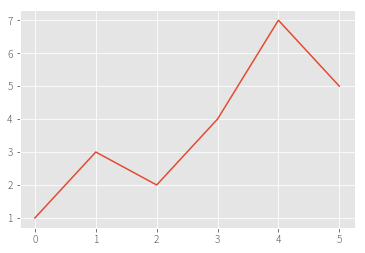

In [7]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig = plt.figure()

ax= fig.add_subplot(111)

ax.plot([1, 3, 2, 4, 7, 5])

plt.show()

plot() 메서드에는 다음과 같은 데이터 형이 넘겨질 수 있다. 
- 리스트
- 튜플
- numpy.ndarray
- pandas.Series

X값과 Y값 양쪽에 값을 부여할 때 제1, 제2인수에 각각 X값과 Y값을 부여한다. 

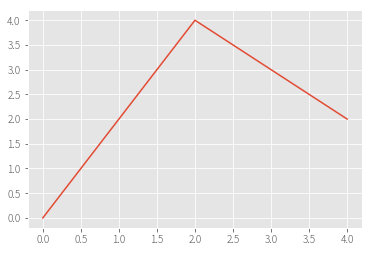

In [8]:
# X값과 Y값을 지정한 꺽은선 그래프 그리기
fig = plt.figure()
ax = fig.add_subplot(111)

x = [0, 2, 4]
y = [0, 4, 2]

ax.plot(x, y)
plt.show()

#### 여러개의 선을 그리는 경우
plot() 메서드를 여러번 실행하면 1개의 서브플롯에 여러개의 그래프를 겹쳐서 그릴 수 있다. 

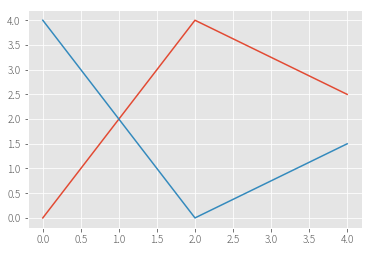

In [9]:
# 여러 개의 선 그리기
fig = plt.figure()
ax = fig.add_subplot(111)

x = [0, 2, 4]
y1 = [0, 4, 2.5]
y2 = [4, 0, 1.5]

# 2 개의 선 그리기
ax.plot(x, y1)
ax.plot(x, y2)
plt.show()

### 꺽은선 그래프 활용하기

실제 데이터를 이용해서 그래프를 그린다. 데이터는 anime_stock_returns.csv 파일을 이용한다. 

In [10]:
# anime_stock_returns.csv 파일 불러오기
import pandas as pd

anime_stock_returns_csv = './anime/anime_stock_returns.csv'
anime_stock_returns_df = pd.read_csv(anime_stock_returns_csv, index_col=0, parse_dates=['Date'])
anime_stock_returns_df.head()

,TOEI ANIMATION,IG Port
Date,,
2015-01-01,1.000000,1.000000
2015-01-02,1.000000,1.000000
2015-01-05,1.011695,1.014082
2015-01-06,1.001463,1.000000
2015-01-07,0.982457,1.000824


시계열 정보를 포함한 데이터를 표현하는 것은 꺽은선 그래프가 적당하다. Matplotlib으로 꺽은선 그래프를 출력해 본다. 

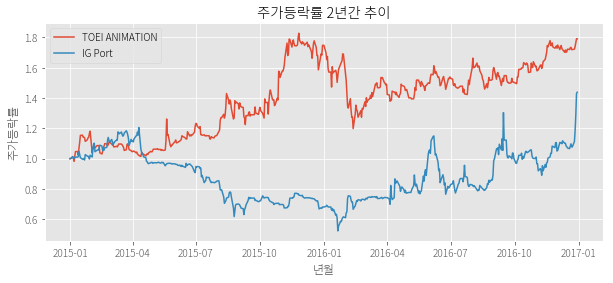

In [11]:
# anime_stock_retunrs.csv 꺽은선 그래프

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)

# 데이터와 범례 지정
ax.plot(anime_stock_returns_df.index, anime_stock_returns_df['TOEI ANIMATION'], label='TOEI ANIMATION')
ax.plot(anime_stock_returns_df.index, anime_stock_returns_df['IG Port'], label='IG Port')

# 타이틀, 축레이블 지정
ax.set_title('주가등락률 2년간 추이')
ax.set_ylabel('주가등락률')
ax.set_xlabel('년월')

# 범례 유효화
ax.legend()
plt.show()

# 사전에 한글폰트의 설치와 설정 파일이 matplotlibrc에서의 한글 폰트 지정이 완료되어 있다 것을 전제로 한다. 
# 한글 폰트의 설정 방법은 ch01을 참조 한다. 

### 두 개의 축을 가진 그래프 그리기

Matplotlib 에서 X축을 공유해 2개의 Y축을 가진 그림을 작성하는 경우에는 Axes.twinx()메서드를 사용한다. 
Y축을 공유해서 2개의 X축을 가진 그림을 그리는 경우에는 twiny()메서드를 사용한다. 

다음 코드는 twinx()메서드를 사용해서 마감가(Close)와 거래량(Volume)을 하나의 그래프로 나타내고 있다. 
마감가는 꺽은선 그래프로, 거래량은 막대그래프로 나타내는 것이 일반적이다.



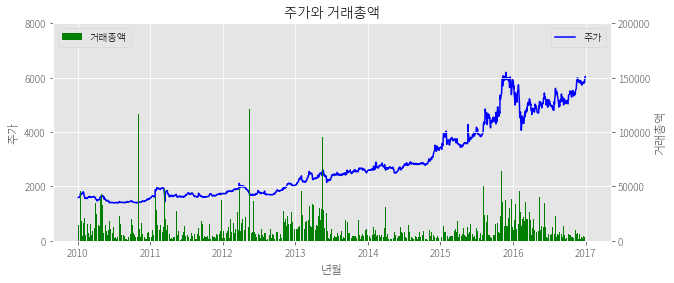

In [12]:
# 두 개의 축을 가진 그래프

t4816_csv = './anime/4816.csv'
t4816_df = pd.read_csv(t4816_csv, index_col=0, parse_dates=['Date'])

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(111)

ax1.plot(t4816_df.index, t4816_df['Close'], color='b', label='주가')

# X축을 공유해서 Y축을 2개 사용하는 설정
ax2 = ax1.twinx()
ax2.bar(t4816_df.index, t4816_df['Volume'], color='g', label='거래총액', width=2)

# 축과 축 레이블설정
ax1.set_yticks([i * 2000 for i in range(5)])
ax1.set_ylabel('주가')
ax1.set_xlabel('년월')
ax2.set_yticks([i * 50000 for i in range(5)])
ax2.set_ylabel('거래총액')

# 그래프 타이틀 설정
ax1.set_title('주가와 거래총액')

# 범례 설정
ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()